In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from skimage.transform import resize, rescale
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [2]:
# flatten the images
digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
classifier.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = classifier.predict(X_test)

In [42]:
import mnist
def pad_crop(img, width):
    return img[width: img.shape[0] - width, width: img.shape[1] - width]

test_img, test_lbl = mnist.extract_test()
transform = lambda img: resize(pad_crop(img, 5), (8,8)).reshape(8*8)
new_img = [transform(img) for img in test_img]
new_img = np.array(new_img)

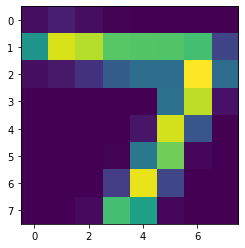

In [45]:
plt.imshow(new_img[0].reshape(8,8))

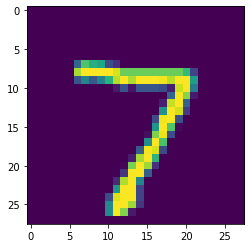

In [43]:
plt.imshow(test_img[0])

In [46]:
predicted = classifier.predict(new_img)
res = predicted == test_lbl
res.sum() / res.shape[0]

0.1038